In [1]:
from langchain_groq import ChatGroq
from langchain_ollama import ChatOllama
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from dotenv import  load_dotenv
load_dotenv()

True

In [2]:
groq=ChatGroq(model='llama-3.1-8b-instant')
ollama=ChatOllama(model='deepseek-r1:8b')


In [3]:
class BatsmanState(TypedDict):

    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    boundary_percent: float
    summary: str

In [4]:
def calculate_sr(state: BatsmanState):

    sr = (state['runs']/state['balls'])*100
    
    return {'sr': sr}

In [5]:
def calculate_sr(state: BatsmanState):

    sr = (state['runs']/state['balls'])*100
    
    return {'sr': sr}

In [6]:
def calculate_bpb(state: BatsmanState):

    bpb = state['balls']/(state['fours'] + state['sixes'])

    return {'bpb': bpb}

In [7]:
def calculate_boundary_percent(state: BatsmanState):

    boundary_percent = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100

    return {'boundary_percent': boundary_percent}

In [8]:
def summary(state: BatsmanState):

    summary = f"""
Strike Rate - {state['sr']} \n
Balls per boundary - {state['bpb']} \n
Boundary percent - {state['boundary_percent']}
"""
    
    return {'summary': summary}

In [24]:
def groq_summary(state: BatsmanState):
    # You must inject the state variables into the prompt!
    prompt = (
        f"The batsman scored {state['runs']} runs off {state['balls']} balls. "
        f"Strike Rate: {state['sr']:.2f}, Balls per Boundary: {state['bpb']:.2f}, "
        f"Boundary %: {state['boundary_percent']:.2f}%. "
        "Explain this performance to someone new to cricket."
    )
    answer = groq.invoke(prompt)
    print(answer.content)
    return {"summary": answer.content}

In [25]:
graph = StateGraph(BatsmanState)

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_percent', calculate_boundary_percent)
graph.add_node('summary', summary)
graph.add_node('groq_summary', groq_summary)

In [26]:
graph.add_edge(START, 'calculate_sr')
graph.add_edge('calculate_sr', 'calculate_bpb')
graph.add_edge('calculate_bpb', 'calculate_boundary_percent')
graph.add_edge('calculate_boundary_percent', 'summary')
graph.add_edge('summary', 'groq_summary')
graph.add_edge('groq_summary', END)

In [27]:
workflow = graph.compile()

In [28]:
intial_state = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}

In [29]:


workflow.invoke(intial_state)

In cricket, a batsman's performance is often measured by their strike rate and scoring rate. 

The strike rate is a measure of how quickly a batsman scores runs. In this case, the batsman scored 100 runs off 50 balls. This means they scored 1 run every 0.5 balls, which is quite fast. The strike rate of 200.00 means that on average, the batsman scores 200 runs in 100 balls.

Now, let's talk about the balls per boundary, which is 5.00. In cricket, a boundary is when a batsman hits the ball to the fence, resulting in 4 runs. This is considered a big hit. With 5 balls per boundary, it means the batsman hit 20 boundaries (100 / 5) in their innings.

Lastly, the boundary percentage is 48.00%, which means that 48% of the batsman's runs came from boundaries. This is a high percentage, indicating that the batsman was able to hit a lot of big shots.

In summary, this batsman was an aggressive player who scored quickly, hit a lot of boundaries, and was able to dominate the bowling attack.

To giv

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percent': 48.0,
 'summary': "In cricket, a batsman's performance is often measured by their strike rate and scoring rate. \n\nThe strike rate is a measure of how quickly a batsman scores runs. In this case, the batsman scored 100 runs off 50 balls. This means they scored 1 run every 0.5 balls, which is quite fast. The strike rate of 200.00 means that on average, the batsman scores 200 runs in 100 balls.\n\nNow, let's talk about the balls per boundary, which is 5.00. In cricket, a boundary is when a batsman hits the ball to the fence, resulting in 4 runs. This is considered a big hit. With 5 balls per boundary, it means the batsman hit 20 boundaries (100 / 5) in their innings.\n\nLastly, the boundary percentage is 48.00%, which means that 48% of the batsman's runs came from boundaries. This is a high percentage, indicating that the batsman was able to hit a lot of big shots.\n\nIn summary, this b

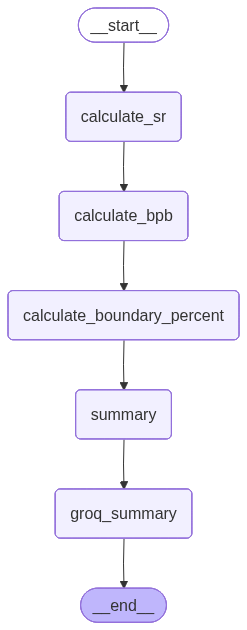

In [30]:
from IPython.display import Image

Image(workflow.get_graph().draw_mermaid_png())